# [Face completion with a multi-output estimators](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multioutput_face_completion.html#sphx-glr-auto-examples-miscellaneous-plot-multioutput-face-completion-py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

In [4]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [5]:
data, targets = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/hskim/scikit_learn_data


In [24]:
train = data[targets < 30]
test = data[targets >= 30]

In [25]:
print(data.shape)

(400, 4096)


In [7]:
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

In [8]:
rng

RandomState(MT19937) at 0x7FECC1E3C740

In [9]:
face_ids

array([46, 55, 69,  1, 87])

In [11]:
print(data.shape[1])

4096


In [12]:
n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

In [14]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV()
}

In [15]:
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [16]:
image_shape = (64, 64)

In [17]:
print(np.shape(X_train))
print(np.shape(y_train))

(300, 2048)
(300, 2048)


In [22]:
print(train[0, 4096  // 2:])

[0.6446281  0.61570245 0.6446281  ... 0.15289256 0.16115703 0.1570248 ]


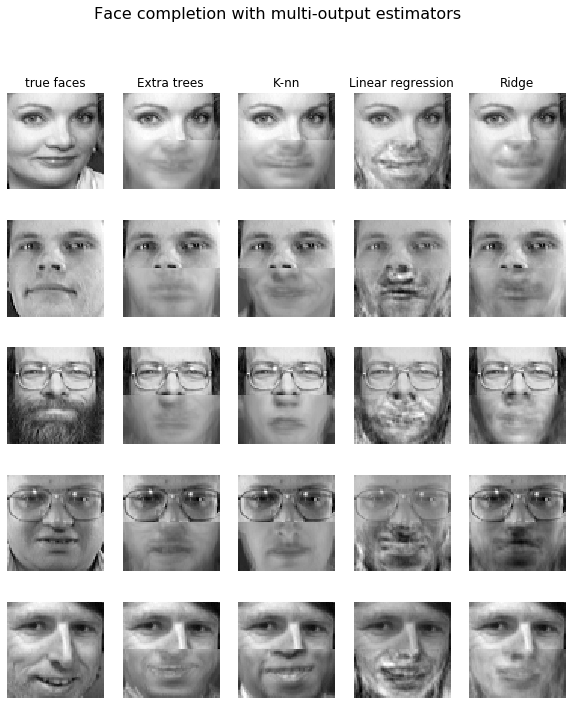

In [23]:
n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()